In [1]:
import pandas as pd
df = pd.read_csv("/kaggle/input/nhanes-dataset/nhanes_2015_2016.csv")

We know that a scatter plot is widely used to present the relationship between two continuous variables. Pair plot puts several scatter plots in one plot and also provides the distribution diagonally. This article is a tutorial on how to make Pairplots of different styles.

This article will cover:
1. Pair plot using Pandas and Matplotlib
1. More Stylish and informative Pair plots using `Seaborn library`
1. Use of the ‘PairGrid’ function to make more dynamic pair plots

In [2]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

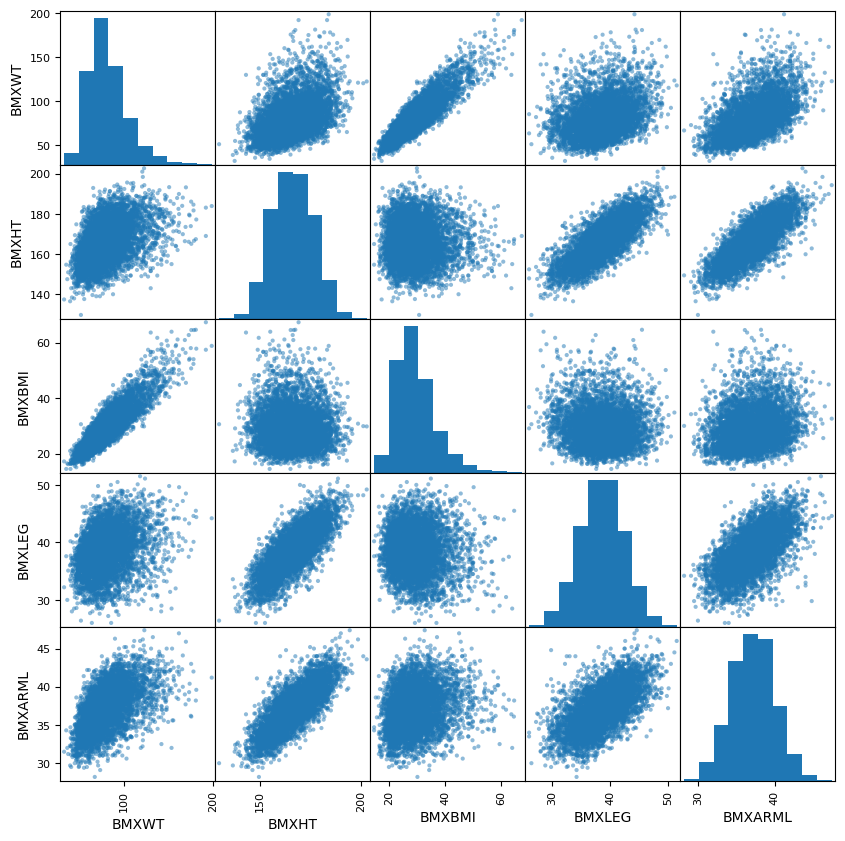

In [3]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(df[['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML']], figsize = (10, 10))
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

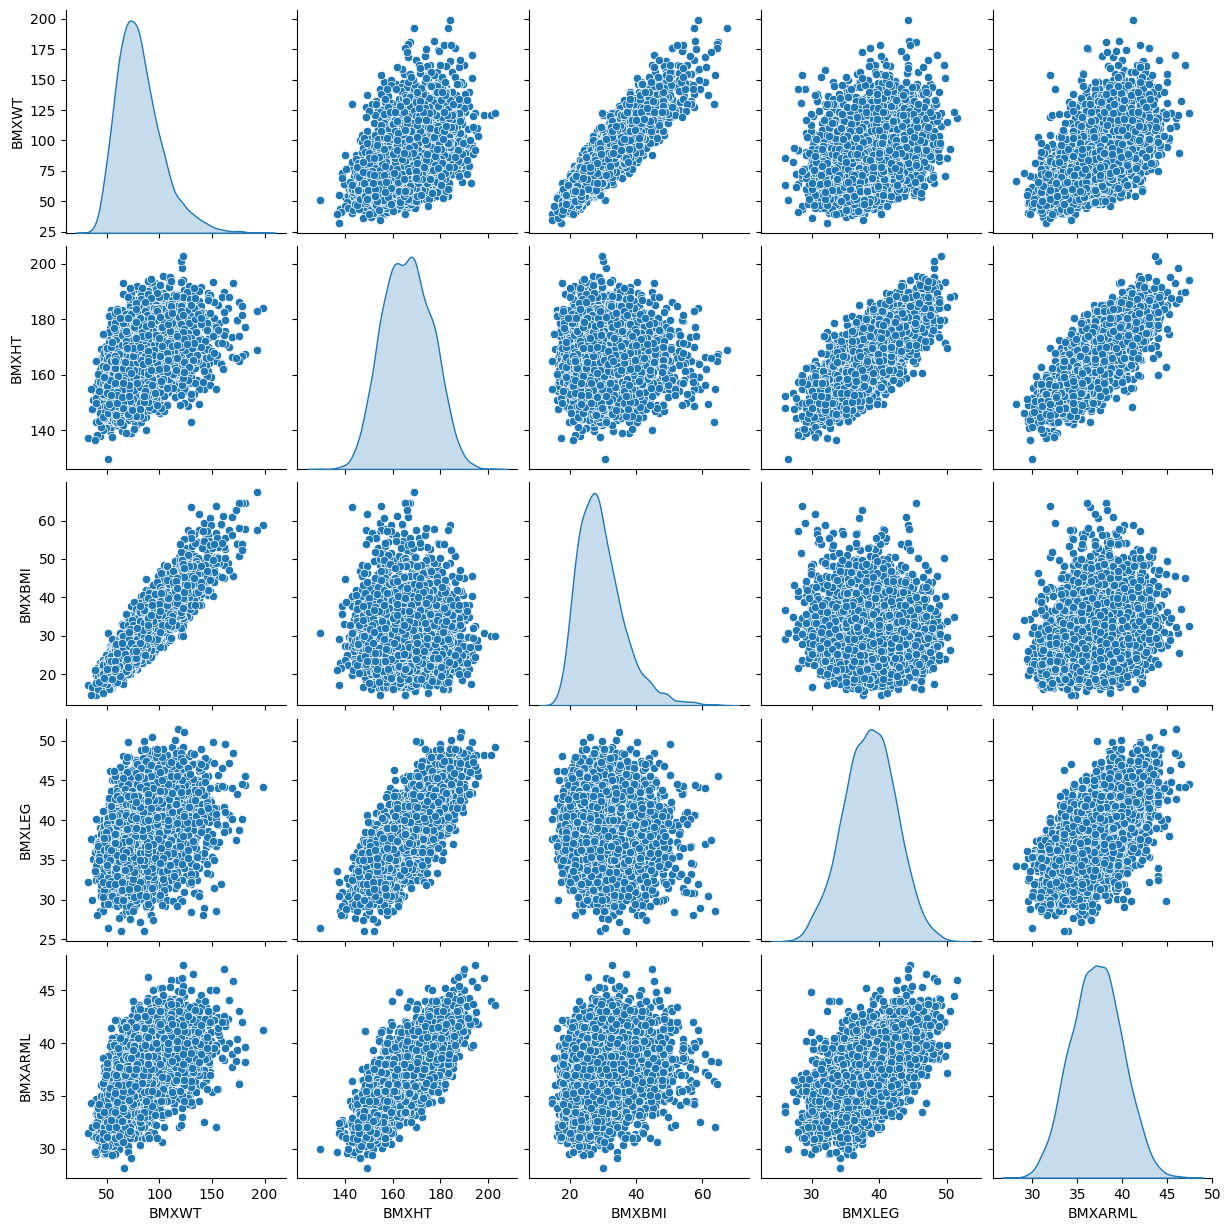

In [4]:
import seaborn as sns
d = df[['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML']]
sns.pairplot(d, diag_kind = 'kde')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

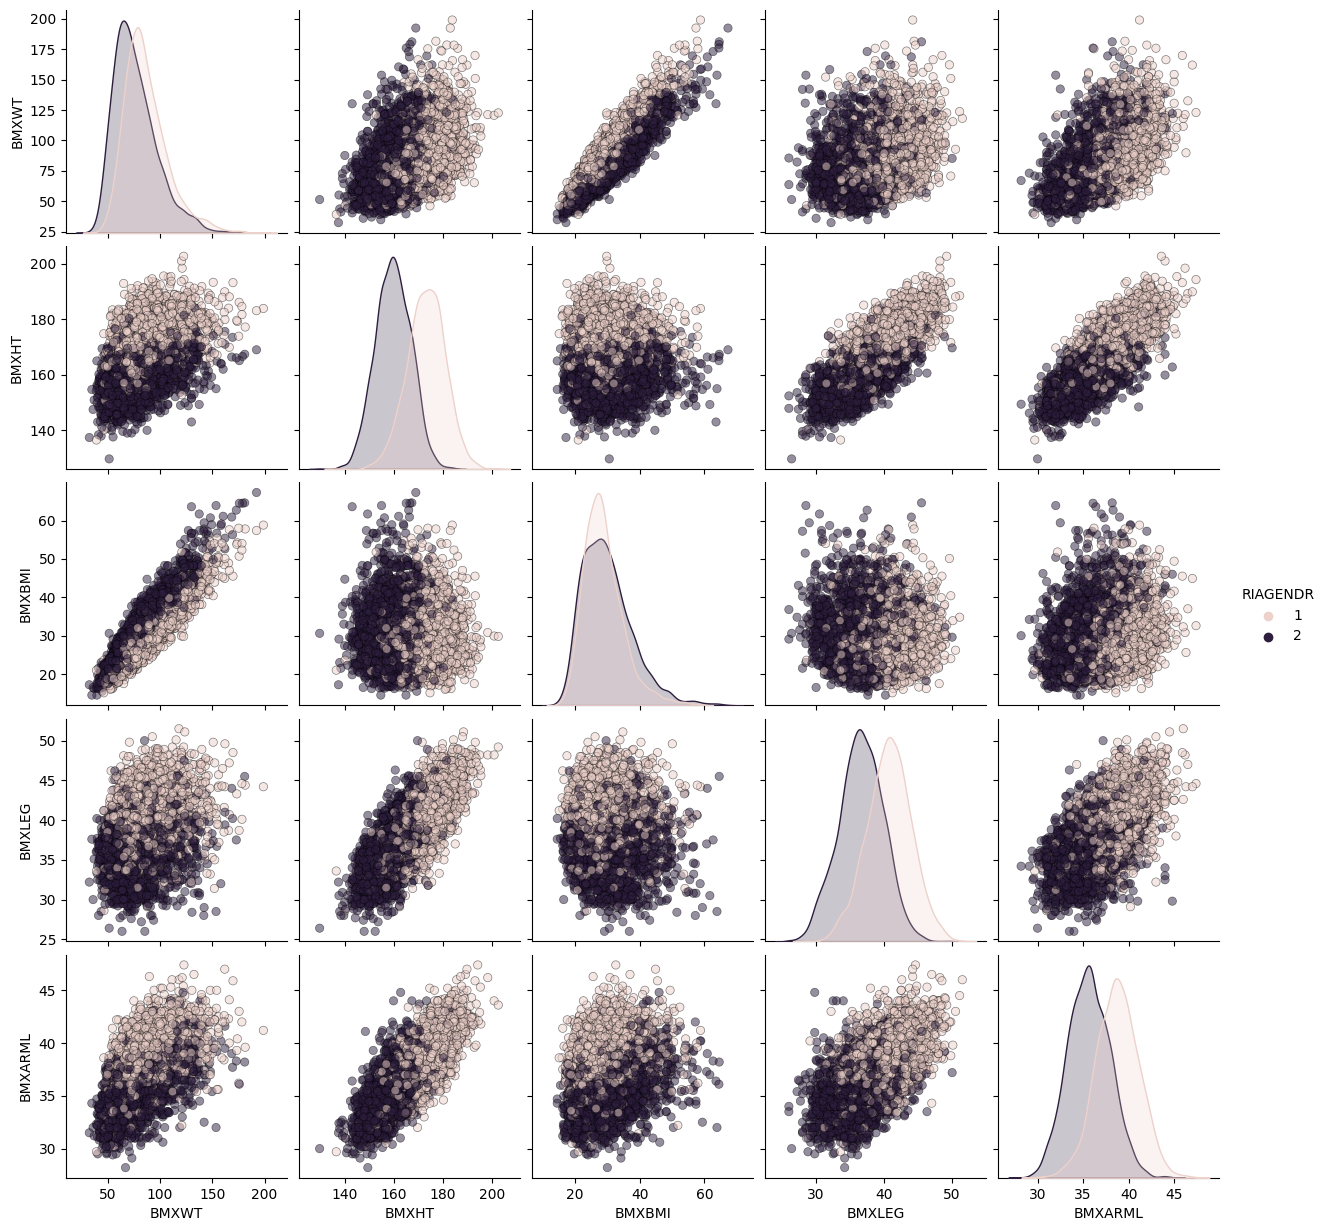

In [5]:
d = df[['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML','RIAGENDR']]

sns.pairplot(d,diag_kind = 'kde', hue = 'RIAGENDR', plot_kws={'alpha':0.5,'edgecolor':'k'})

This time we get all the plots in the pair plot segregated by the gender variable. At the same time, I am adding some transparency using the alpha parameter and an edge color as well.

# PairGrid

Using PairGrid, an empty grid can be generated. And later you can fill this up as you like. Let's see this in action:

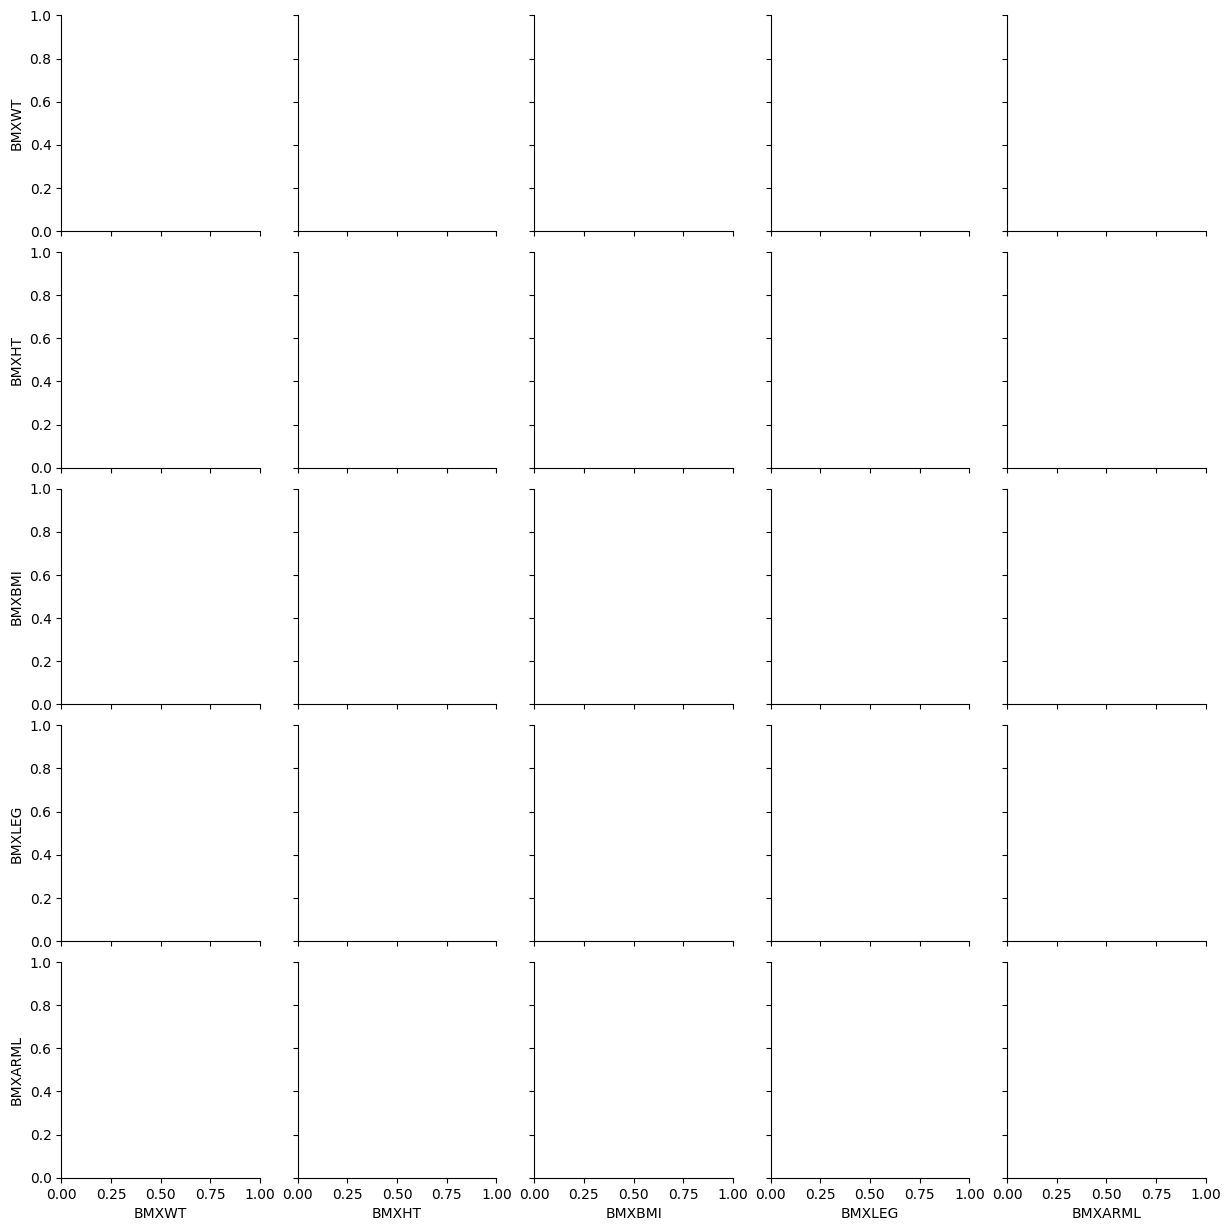

In [6]:
g = sns.PairGrid(df, vars = ['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML'], hue = 'RIAGENDR')

Now we have fill up the empty boxes, then I will use the histograms for the diagonal plots and the rest will stay the scatter plot as before. It does not have to be a scatter plot. It can be any other bivariate plot. We will see an example in a bit:

In [7]:
g.map_diag(plt.hist, alpha=0.6)
g.map_offdiag(plt.scatter,alpha=0.5)
g.add_legend()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

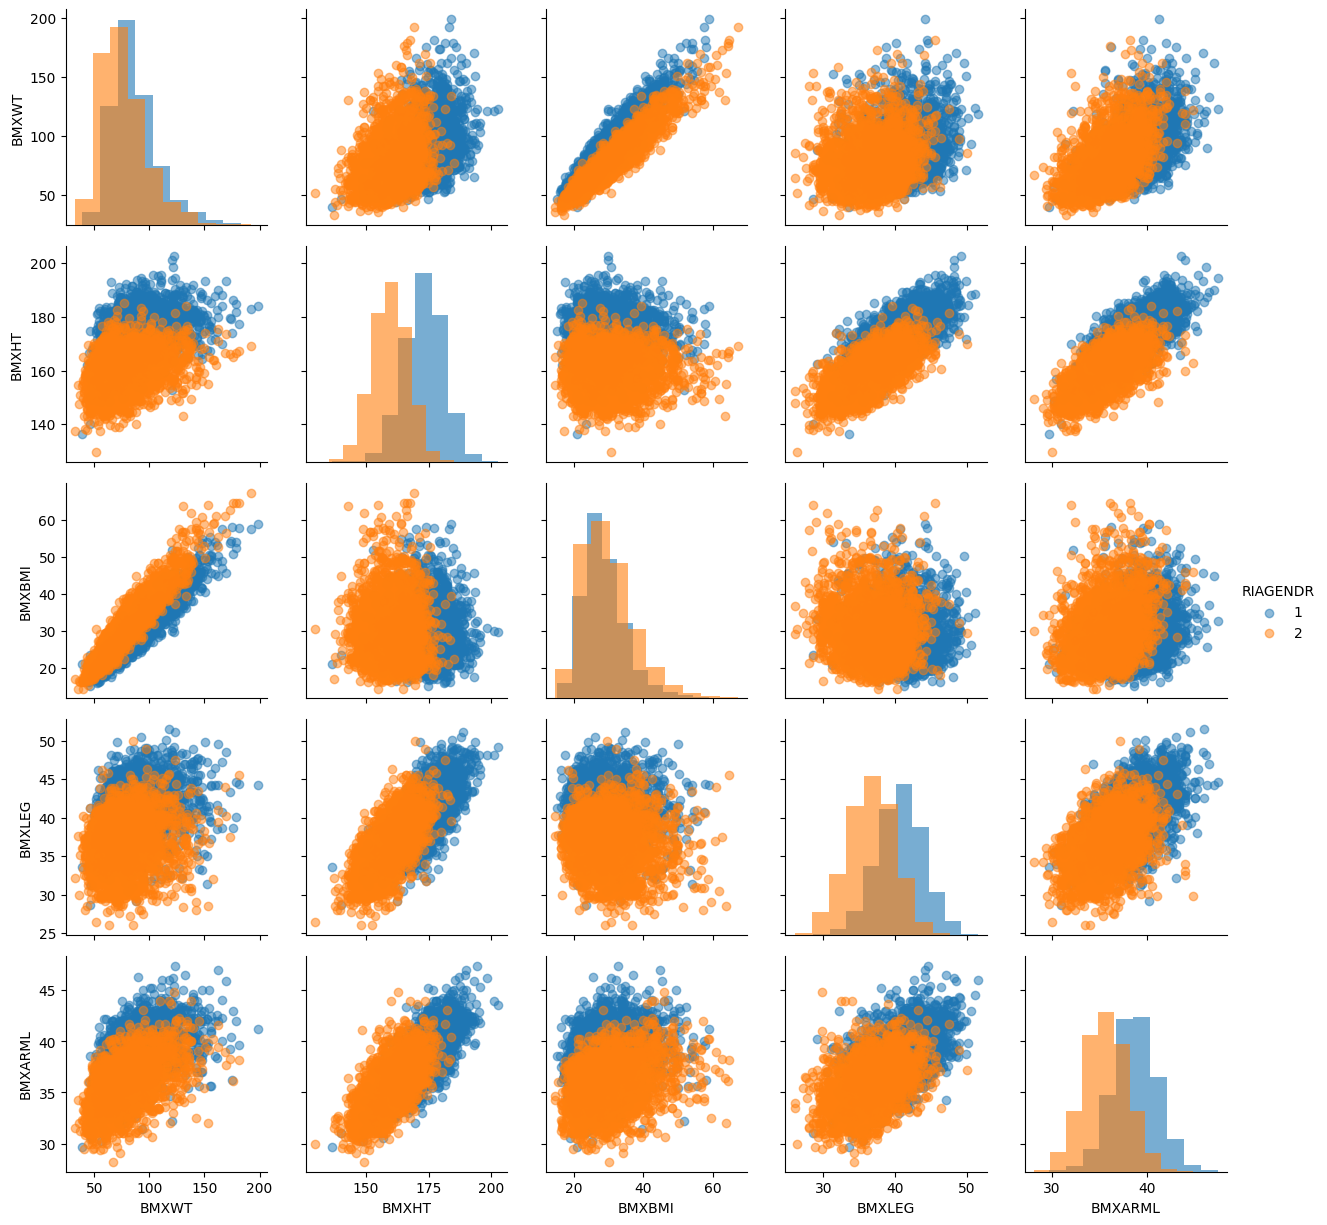

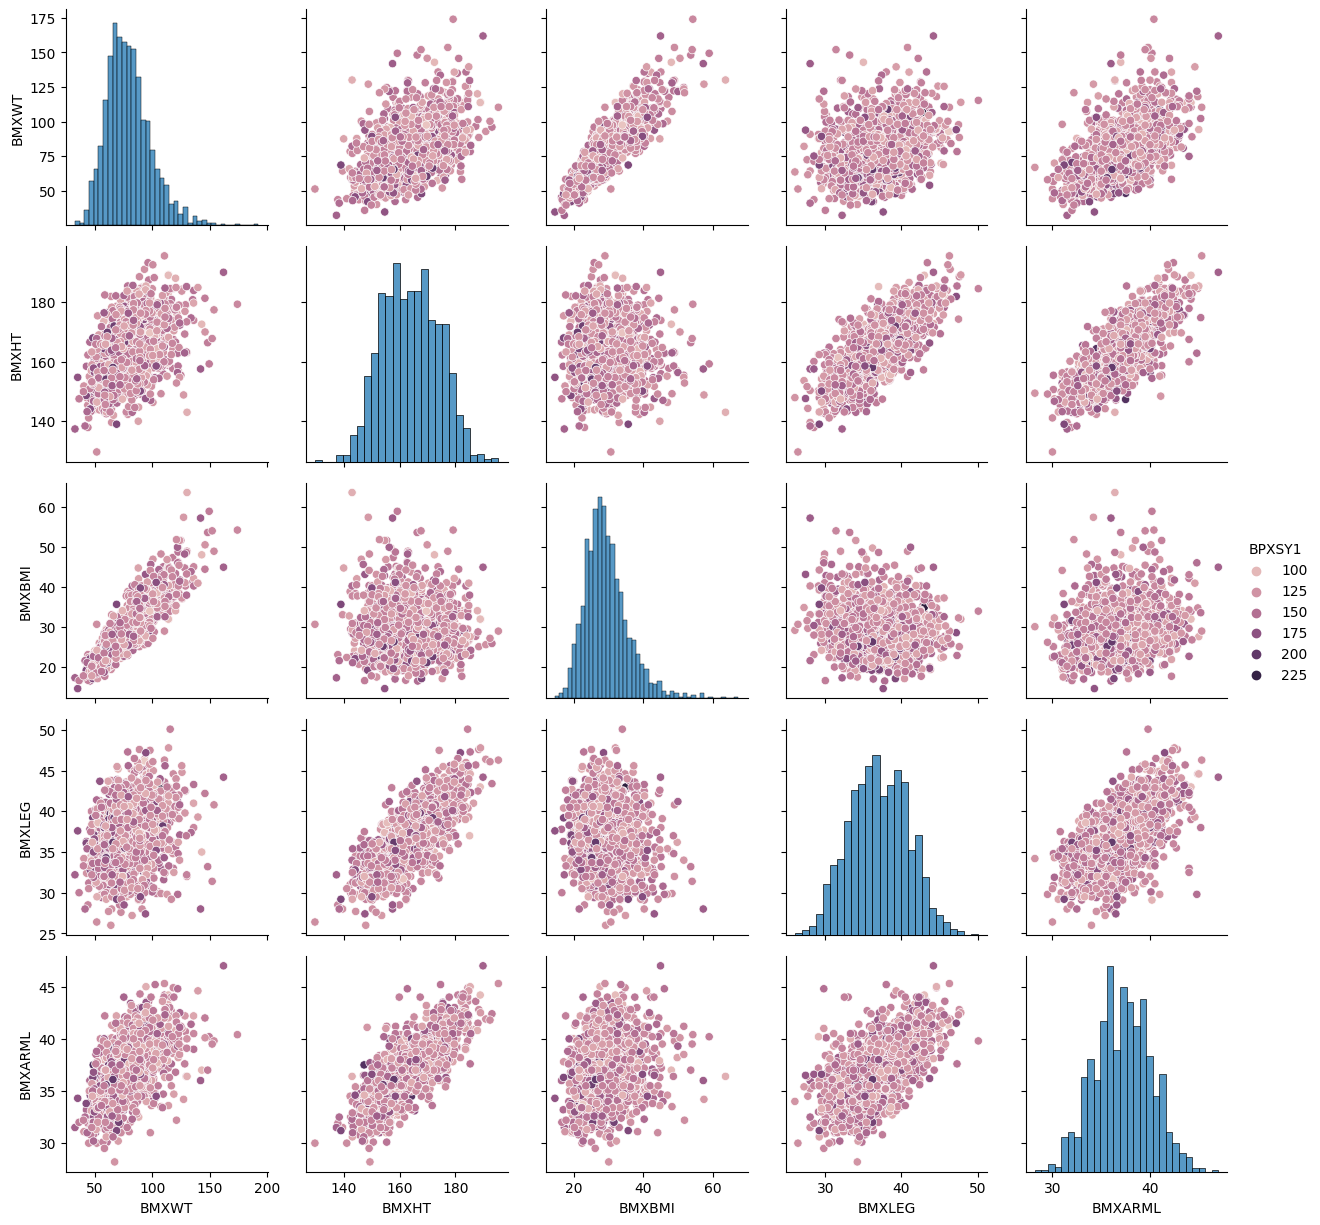

In [8]:
g = sns.PairGrid(df[df["RIDAGEYR"]>60],
   vars = ['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG',  'BMXARML'], hue = "BPXSY1")

g.map_diag(sns.histplot, hue = None)
g.map_offdiag(sns.scatterplot)
g.add_legend()

Credit:

https://towardsdatascience.com/pair-plot-and-pairgrid-in-details-f782975032ea